#  Part 1 - Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import math
import json
from pandas.io.json import json_normalize

pd.options.display.max_columns=1000
sns.set_theme()

In [2]:
df_logins = pd.read_json('C:/Users/marki/Desktop/SB Data Science BC/Springboard/ultimate_challenge/logins.json')
df_logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df_logins.shape

(93142, 1)

In [4]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
df_logins = df_logins.set_index('login_time')

In [6]:
df_logins['every15mins'] = 0
df_logins = df_logins.resample('15min').count()
df_logins.head()

,every15mins
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [7]:
df_logins = df_logins.reset_index()

In [8]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9788 entries, 0 to 9787
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   login_time   9788 non-null   datetime64[ns]
 1   every15mins  9788 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 153.1 KB


In [9]:
df_logins['dayOfWeek'] = df_logins['login_time'].dt.day_name()
df_logins.head()

,login_time,every15mins,dayOfWeek
0,1970-01-01 20:00:00,2,Thursday
1,1970-01-01 20:15:00,6,Thursday
2,1970-01-01 20:30:00,9,Thursday
3,1970-01-01 20:45:00,7,Thursday
4,1970-01-01 21:00:00,1,Thursday


In [10]:
df_wdname = df_logins.groupby('dayOfWeek', as_index=False).sum()
df_wdname

,dayOfWeek,every15mins
0,Friday,15208
1,Monday,8823
2,Saturday,19377
3,Sunday,18167
4,Thursday,11960
5,Tuesday,9268
6,Wednesday,10339


Text(0.5, 1.0, 'Logins per Day of the Week')

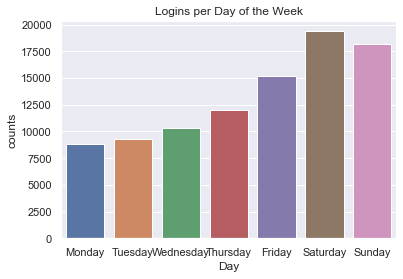

In [11]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.barplot(data = df_wdname, x = 'dayOfWeek', y = 'every15mins', order=order)
plt.xlabel('Day')
plt.ylabel('counts')
plt.title('Logins per Day of the Week')

In [12]:
df_logins['hourOfDay'] = df_logins['login_time'].dt.hour
df_logins.head()

,login_time,every15mins,dayOfWeek,hourOfDay
0,1970-01-01 20:00:00,2,Thursday,20
1,1970-01-01 20:15:00,6,Thursday,20
2,1970-01-01 20:30:00,9,Thursday,20
3,1970-01-01 20:45:00,7,Thursday,20
4,1970-01-01 21:00:00,1,Thursday,21


In [13]:
df_hour = df_logins.groupby('hourOfDay', as_index=False).sum()
df_hour.head()

,hourOfDay,every15mins
0,0,5993
1,1,6317
2,2,5800
3,3,4831
4,4,5034


Text(0.5, 1.0, 'Logins by each hour of the day')

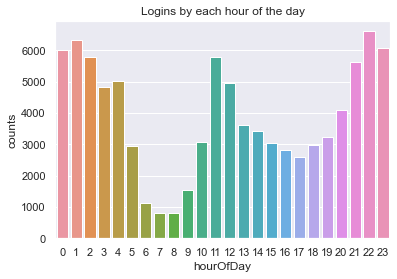

In [14]:
sns.barplot(data = df_hour, x = 'hourOfDay', y = 'every15mins')
plt.xlabel('hourOfDay')
plt.ylabel('counts')
plt.title('Logins by each hour of the day')

In [15]:
df_eachhour = df_logins.groupby(['dayOfWeek','hourOfDay'], as_index=False).sum()
df_eachhour.head()

,dayOfWeek,hourOfDay,every15mins
0,Friday,0,975
1,Friday,1,957
2,Friday,2,771
3,Friday,3,502
4,Friday,4,353


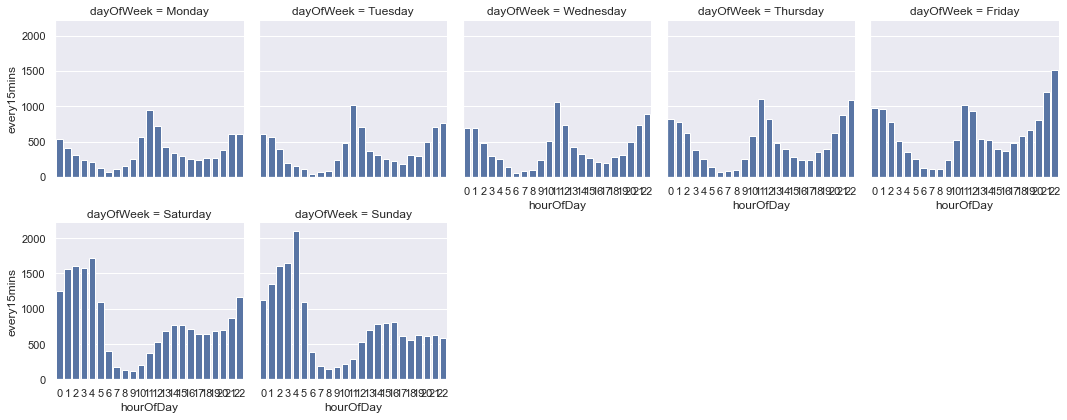

In [16]:
count_plotted = sns.FacetGrid(df_eachhour, col='dayOfWeek', col_wrap=5, col_order=order)
count_plotted.map(sns.barplot, 'hourOfDay', 'every15mins', order=range(0,23))

By analyzing the plots, it appears that most logins occur on Saturday and Sunday.

Looking at the plots that divide each day into hours it there appears that during the week (M-F) there is a 12-hour trend in the spikes of logins. Logins spike in the beginning of each day (12 am) and again around lunchtime (12 pm). Over the weekend, however (Sat and Sun) the overnight spike lasts until around 5am and picks up again after lunch and stays steady for the rest of the day before spiking again overnight.

Taken overall, though, there is a roughly 12-hour spike in logins around 12 pm and 12 am.